# 问题定义

问题：判断哪种裂变带来更大的增长幅度

营销团队为易速鲜花的用户设计了两种裂变方案——“情侣花享”和“拼团盛放”，一个是类似于买一送一的促销，让用户把促销分享给自己的另一半。另一个裂变方案是用过生成专属海报进行拼团购买，团越大促销折扣越大。

那么，如何让机器自动的识别出，某一种裂变（或者说其它促销方案）所最易感的人群，然后把该裂变发给他或她呢？

# 数据预处理

In [1]:
import pandas as pd #导入Pandas
import numpy as np #导入NumPy
df_fission = pd.read_csv('易速鲜花增长模型.csv') #载入数据
print('用户数:', df_fission.count()['用户码']) #查看数据条目数
df_fission.head() #显示头几行数据

用户数: 64000


,用户码,曾助力,曾拼团,曾推荐,设备,城市类型,R值,M值,裂变类型,是否转化
0,1,0,1,0,电脑,中小,10,138.00,情侣花享,0
1,2,0,1,0,电脑,一线,4,105.59,拼团盛放,0
2,3,0,1,0,电脑,一线,1,494.13,拼团盛放,1
3,4,0,1,1,手机,二线,10,148.45,没有促销,0
4,5,1,0,0,手机,二线,2,337.18,拼团盛放,0


## 可视化

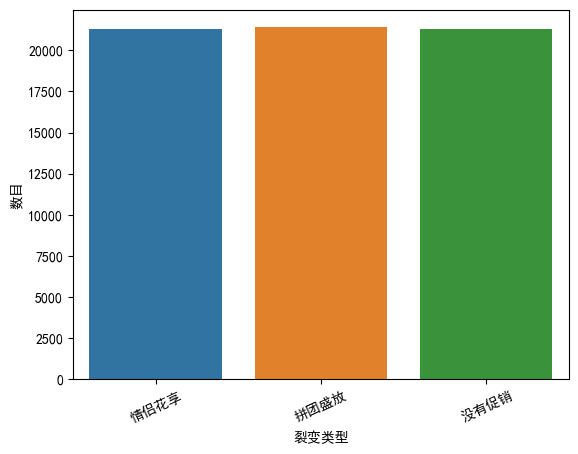

In [2]:
import matplotlib.pyplot as plt #导入pyplot模块
plt.rcParams['font.family'] = ['SimHei'] #或者 ['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns #导入Seaborn
fig = sns.countplot(x='裂变类型', data=df_fission) #创建柱状计数图
fig.set_xticklabels(fig.get_xticklabels(),rotation=25) #X轴标签倾斜
fig.set_ylabel("数目") #Y轴标题
plt.show() #显示图像

这段代码使用Python绘图库Matplotlib和Seaborn创建一个柱状计数图（countplot），用于显示数据集`df_fission`中各种裂变类型的数量分布。让我为您解释这段代码的工作原理。

1. 导入所需的库：
```python
import matplotlib.pyplot as plt
import seaborn as sns
```
这两行导入了Matplotlib和Seaborn库，这两个库是创建可视化图形所必需的。

2. 设置字体和显示参数：
```python
plt.rcParams['font.family'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
```
这两行代码将字体设置为"SimHei"，以便在图形中正常显示中文字符。`'axes.unicode_minus'`设置为False是为了在图形中正常显示负号。

3. 创建柱状计数图并设置图形参数：
```python
fig = sns.countplot(x='裂变类型', data=df_fission)
fig.set_xticklabels(fig.get_xticklabels(), rotation=25)
fig.set_ylabel("数目")
```
这三行代码使用Seaborn库的`countplot`函数创建一个柱状计数图。`x`参数设置为必要的裂变类型列，`data`指定为数据框`df_fission`。这将生成一个按照裂变类型显示数据集中各类别数目的柱状图。

接着，使用`set_xticklabels`方法设置x轴刻度标签的显示方式。通过将标签的旋转角度设置为25度，可以让x轴标签更易阅读，避免相互重叠。最后，使用`set_ylabel`方法设置y轴标签为"数目"。

4. 显示图形：
```python
plt.show()
```
这行代码将生成的柱状计数图显示出来。通过观察生成的图形，可以直观地了解数据集`df_fission`中各种裂变类型的分布情况。

<BarContainer object of 3 artists>

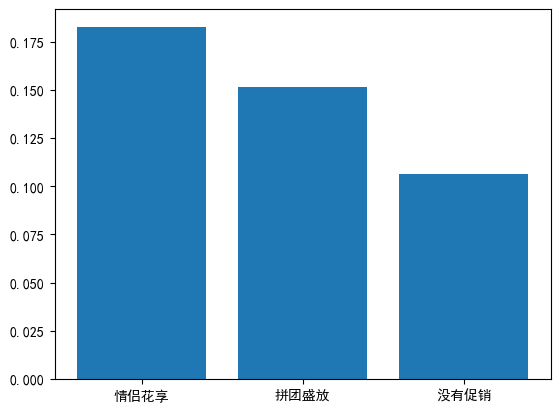

In [3]:
df_plot = df_fission.groupby('裂变类型').是否转化.mean().reset_index() #促销分组的转化率均值
plt.bar(df_plot['裂变类型'],df_plot['是否转化']) #不同促销转化均值柱状图

这段代码首先计算不同裂变类型（或促销分组）的转化率均值，然后使用Matplotlib绘制其柱状图。这是代码的详细说明：

1. 计算不同裂变类型的转化率均值：
```python
df_plot = df_fission.groupby('裂变类型').是否转化.mean().reset_index()
```
这行代码首先根据裂变类型（或促销分组）对数据框 `df_fission` 进行分组。接着，计算每个分组内的"是否转化"列的均值（即转化率）。通过调用 `.reset_index()` 方法，将多级索引转换为默认索引，使结果更易读。

`df_plot` 结果将包含每个裂变类型及其对应的转化率均值。

2. 绘制柱状图：
```python
plt.bar(df_plot['裂变类型'], df_plot['是否转化'])
```
这行代码使用 Matplotlib 的 `plt.bar()` 函数创建一个柱状图。x 轴的数据来源于 `df_plot` 数据框的 "裂变类型" 列，y 轴的数据来源于 "是否转化" 列（即转化率均值）。

此柱状图可以直观地展示每种裂变类型（促销分组）的转化率均值，从而帮助我们了解哪种裂变类型在促进转化方面更加有效。要显示绘制的图形，请记得在代码末尾添加 `plt.show()` 命令。

## 创建哑变量

In [4]:
df_dummies = df_fission.drop(['裂变类型'],axis=1) #在拆分哑变量前，先拿掉裂变类型
df_dummies = pd.get_dummies(df_dummies, drop_first = True) #为分类变量拆分哑变量
df_dummies['裂变类型'] = df_fission['裂变类型'] #把裂变类型放回去
df_fission = df_dummies.copy() #把哑变量数据集复制给元数据集
df_fission.head() #显示数据

,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,0,1,1,0,情侣花享
1,2,0,1,0,4,105.59,0,0,1,0,0,拼团盛放
2,3,0,1,0,1,494.13,1,0,1,0,0,拼团盛放
3,4,0,1,1,10,148.45,0,1,0,0,1,没有促销
4,5,1,0,0,2,337.18,0,1,0,0,1,拼团盛放


这段代码的目的是对数据框`df_fission`中的分类变量（如裂变类型）创建哑变量（dummy variables），以便在进一步的数据分析或建模过程中使用。步骤如下：

1. 移除裂变类型列：
```python
f_dummies = df_fission.drop(['裂变类型'], axis=1)
```
这行代码从`df_fission`数据框中移除裂变类型列。这是为了避免将其视为一个分类变量，从而不会在接下来的步骤中为它生成哑变量。结果存储在`f_dummies`中。

2. 为分类变量生成哑变量：
```python
df_dummies = pd.get_dummies(f_dummies, drop_first=True)
```
这行代码使用pandas库中的`get_dummies()`函数，为`f_dummies`中的所有分类变量生成哑变量。`drop_first=True`参数是为了避免多重共线性（线性相关性），该参数将删除每个分类变量的第一个哑变量列。结果存储在`df_dummies`中。

3. 把裂变类型列放回到数据框：
```python
df_dummies['裂变类型'] = df_fission['裂变类型']
```
这行代码将裂变类型列添加回`df_dummies`数据框。

4. 复制哑变量数据集给原始数据集：
```python
df_fission = df_dummies.copy()
```
这行代码将`df_dummies`中包含哑变量的数据框复制给原始数据框`df_fission`。这样，你就可以使用包含哑变量的`df_fission`进行后续数据分析或建模。

5. 显示数据：
```python
df_fission.head()
```
这行代码将显示`df_fission`数据框的前几行，以便你查看在数据中创建的哑变量情况。

## 构建特征和标签数据集

In [5]:
df_discount = df_fission.query("裂变类型 == '情侣花享' | 裂变类型 == '没有促销'")

这段代码会从原始数据框 `df_fission` 中筛选出只包含 "情侣花享" 和 "没有促销" 两种裂变类型（促销类型）的数据，并将筛选后的结果存储在名为 `df_discount` 的新数据框中。

具体操作如下：

```python
df_discount = df_fission.query("裂变类型 == '情侣花享' | 裂变类型 == '没有促销'")
```

使用 `query()` 函数对 `df_fission` 数据框进行筛选。在 `query()` 函数内，我们设置条件 "裂变类型 == '情侣花享' | 裂变类型 == '没有促销'"。这表示我们只保留裂变类型为 "情侣花享" 或 "没有促销" 的行。注意，使用 `|` 符号来表示“或”逻辑运算。

最后，筛选后的结果被存储在 `df_discount` 数据框中。你可以使用这个新数据框针对这两种裂变类型进行进一步的分析。

In [6]:
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 1), '标签'] = 0 #有应答裂变组,裂变购买者
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 0), '标签'] = 1 #无应答裂变组,裂变未购买者
df_discount.loc[(df_discount.裂变类型 == '没有促销') &  (df_discount.是否转化 == 1), '标签'] = 2 #有应答控制组,无裂变购买者
df_discount.loc[(df_discount.裂变类型 == '没有促销') &  (df_discount.是否转化 == 0), '标签'] = 3 #无应答控制组,无裂变未购买者
df_discount.head()

C:\Users\Abraham Cheng\AppData\Local\Temp\ipykernel_30792\675391188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 1), '标签'] = 0 #有应答裂变组,裂变购买者


,用户码,曾助力,曾拼团,曾推荐,R值,M值,是否转化,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型,标签
0,1,0,1,0,10,138.00,0,0,1,1,0,情侣花享,1.0
3,4,0,1,1,10,148.45,0,1,0,0,1,没有促销,3.0
5,6,0,1,1,10,56.48,0,0,1,0,1,情侣花享,1.0
6,7,1,1,1,2,551.98,0,0,0,0,0,情侣花享,1.0
8,9,1,0,1,7,29.99,1,0,1,0,1,情侣花享,0.0


这段代码的目的是在 `df_discount` 数据框中，根据裂变类型（'情侣花享'或'没有促销'）和是否转化（购买了产品或没有购买）的组合为每个观察（行）设置一个新的标签列。以下是详细步骤：

1. 标签0（有应答裂变组，裂变购买者）：
```python
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 1), '标签'] = 0
```
在这行代码中，我们使用 `loc[]` 索引器为满足条件 "裂变类型 == '情侣花享'（有裂变）" 和 "是否转化 == 1（购买了产品）" 的行设置 `标签` 列的值为 0。

2. 标签1（无应答裂变组，裂变未购买者）：
```python
df_discount.loc[(df_discount.裂变类型 == '情侣花享') & (df_discount.是否转化 == 0), '标签'] = 1
```
在这行代码中，我们为满足条件 "裂变类型 == '情侣花享'（有裂变）" 和 "是否转化 == 0（未购买产品）" 的行设置 `标签` 列的值为 1。

3. 标签2（有应答控制组，无裂变购买者）：
```python
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 1), '标签'] = 2
```
在这行代码中，我们为满足条件 "裂变类型 == '没有促销'（无裂变）" 和 "是否转化 == 1（购买了产品）" 的行设置 `标签` 列的值为 2。

4. 标签3（无应答控制组，无裂变未购买者）：
```python
df_discount.loc[(df_discount.裂变类型 == '没有促销') & (df_discount.是否转化 == 0), '标签'] = 3
```
在这行代码中，我们为满足条件 "裂变类型 == '没有促销'（无裂变）" 和 "是否转化 == 0（未购买产品）" 的行设置 `标签` 列的值为 3。

5. 查看数据：
```python
df_discount.head()
```
这行代码将显示 `df_discount` 数据框的前几行，以便查看为每个观察设置的标签列。

这样，我们就为 `df_discount` 数据框中的每一行分配了特定的标签（0,1,2,3），因此可以根据这些标签进行进一步的分析和可视化。

In [7]:
X = df_discount.drop(['标签','是否转化'],axis=1) #特征集，Drop掉便签相关字段
y = df_discount.标签 #标签集

这两行代码的目的是从 `df_discount` 数据框中创建特征（X）和标签（y）数据集，用于机器学习模型的训练和评估。

1. 创建特征集（X）：
```python
X = df_discount.drop(['标签', '是否转化'], axis=1)
```
在这行代码中，我们使用数据框的 `drop()` 函数从 `df_discount` 中移除 "标签" 和 "是否转化" 这两列。`axis=1` 表示我们要沿着列方向操作，即删除列。执行此操作后，我们得到一个只包含特征的数据框 `X`，用于机器学习模型的训练。

2. 创建标签集（y）：
```python
y = df_discount.标签
```
在这行代码中，我们仅提取 `df_discount` 中的 "标签" 列，并将其赋值给 `y`。`y` 现在是一个一维数组（或 Pandas Series），用于表示每个样本的目标标签。机器学习模型将根据这些标签进行训练和评估。

现在，你已经将输入数据 `df_discount` 分离为特征集 `X` 和标签集 `y`。接下来，你可以继续根据自己的需求预处理数据（如缺失值处理、归一化等），然后进入到模型训练、评估和优化等阶段。

## 拆分数据集

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)

这段代码从 `sklearn`（Scikit-learn）库中导入 `train_test_split` 函数，用于将特征矩阵 `X` 和标签向量 `y` 分割成训练集和测试集。这是建立机器学习模型时的一种常用方法，我们将样本分成训练集和测试集，以便在训练模型时控制过拟合，同时在没有见过的数据（测试集）上评估模型性能。

在这段代码中：

1. 导入了 `train_test_split`:
```python
from sklearn.model_selection import train_test_split
```

2. 调用 `train_test_split` 函数，将特征矩阵 `X` 和标签向量 `y` 划分为训练和测试集：
```python
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)
```
- `X`: 特征矩阵
- `y`: 标签向量
- `test_size`: 表示测试集占总样本的比例。在这里，我们将其设置为0.2，表示测试集应包括总样本数量的20％。
- `random_state`: 一个整数，它决定了样本划分的随机性。设置一个特定的数值保证每次运行代码时，划分结果都相同。这有助于可重现的结果。

执行这行代码后，我们将得到以下划分的数据集：
- `X_train`：训练集的特征矩阵
- `X_test`：测试集的特征矩阵
- `y_train`：训练集的标签向量
- `y_test`：测试集的标签向量

现在，你已经成功地将数据集拆分为训练集和测试集，并可以继续训练你的机器学习模型了。在训练模型之后，可以使用测试集 (X_test, y_test) 对模型进行评估。

In [9]:
X

,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型
0,1,0,1,0,10,138.00,0,1,1,0,情侣花享
3,4,0,1,1,10,148.45,1,0,0,1,没有促销
5,6,0,1,1,10,56.48,0,1,0,1,情侣花享
6,7,1,1,1,2,551.98,0,0,0,0,情侣花享
8,9,1,0,1,7,29.99,0,1,0,1,情侣花享
...,...,...,...,...,...,...,...,...,...,...,...
63991,63992,1,0,1,2,509.72,1,0,0,1,情侣花享
63992,63993,1,0,0,1,29.99,1,0,1,0,情侣花享
63993,63994,0,1,1,2,499.62,1,0,1,0,情侣花享
63996,63997,0,1,1,3,158.03,1,0,0,1,情侣花享


# 训练模型

In [10]:
import xgboost as xgb #导入xgboost模型
xgb_model = xgb.XGBClassifier() #创建xgboost模型
xgb_model.fit(X_train.drop(['用户码','裂变类型'], axis=1), y_train) #拟合xgboost模型

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

这段代码使用 XGBoost（Extreme Gradient Boosting）算法创建并训练了一个分类器。XGBoost 是一种基于梯度提升决策树（Gradient Boosted Decision Trees）的高性能机器学习算法，适用于各种监督学习任务，例如分类、回归和排序问题。其主要优点是计算速度快、性能优越、易于扩展。

代码分为以下几个步骤：

1. 导入 `xgboost` 库：
```python
import xgboost as xgb
```

2. 创建一个 XGBoost 分类模型：
```python
xgb_model = xgb.XGBClassifier()
```

3. 为了拟合模型，我们需要用训练数据（在这里是 `X_train` 和 `y_train`）进行训练。首先，我们需要删除训练数据中不必要的列（即 '用户码' 和 '裂变类型' 列）。然后使用 `fit` 方法将处理后的数据输入到模型中：
```python
xgb_model.fit(X_train.drop(['用户码', '裂变类型'], axis=1), y_train)
```
- `X_train.drop([...], axis=1)` 去掉了特征矩阵中不需要的列，其中 `axis=1` 表示按列操作。
- `y_train` 是目标变量（分类标签），与 `X_train` 的每个样本相对应。

执行此段代码后，`xgb_model` 将使用训练数据集学习并拟合分类器。训练完成后，你可以使用该模型在测试集上进行预测，并评估模型性能。

In [11]:
uplift_probs = xgb_model.predict_proba(X_test.drop(['用户码','裂变类型'], axis=1)) #预测测试集用户的分类概率
uplift_probs #显示4种概率


array([[0.06593535, 0.45424673, 0.02823122, 0.45158672],
       [0.05830995, 0.42824546, 0.05172778, 0.46171677],
       [0.06482044, 0.42071128, 0.0467466 , 0.46772173],
       ...,
       [0.05796592, 0.4461553 , 0.01884145, 0.47703728],
       [0.08987266, 0.4302734 , 0.07172651, 0.4081274 ],
       [0.04306192, 0.46137613, 0.01824734, 0.4773146 ]], dtype=float32)

## 求出增量分数

In [12]:
discount_uplift = X_test.copy() #构建增量分数数据集   
discount_uplift['P_TR'] = uplift_probs[:,0] #添加有应答裂变概率
discount_uplift['P_TN'] = uplift_probs[:,1] #添加无应答裂变概率
discount_uplift['P_CR'] = uplift_probs[:,2] #添加有应答控制概率
discount_uplift['P_CN'] = uplift_probs[:,3] #添加无应答控制概率
#计算增量分数
discount_uplift['增量分数'] = discount_uplift.eval('P_TR + P_CN - (P_TN + P_CR)') 
# discount_uplift['增量分数'] = discount_uplift.eval('P_CN/(P_CN+P_CR) + P_TR/(P_TN+P_TR) - (P_TN/(P_TN+P_TR) - P_CR/(P_CN+P_CR))') 
discount_uplift

,用户码,曾助力,曾拼团,曾推荐,R值,M值,设备_手机,设备_电脑,城市类型_中小,城市类型_二线,裂变类型,P_TR,P_TN,P_CR,P_CN,增量分数
15868,15869,0,1,1,1,333.39,1,0,0,0,情侣花享,0.065935,0.454247,0.028231,0.451587,0.035044
33225,33226,1,0,0,7,29.99,1,0,0,1,情侣花享,0.058310,0.428245,0.051728,0.461717,0.040054
30309,30310,0,1,1,3,93.94,0,1,0,1,情侣花享,0.064820,0.420711,0.046747,0.467722,0.065084
43369,43370,0,1,1,5,29.99,1,0,0,1,情侣花享,0.039107,0.448344,0.022176,0.490373,0.058960
52540,52541,1,0,0,3,242.33,0,0,0,1,情侣花享,0.108120,0.420489,0.038367,0.433024,0.082289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51156,51157,0,1,0,3,136.39,1,0,0,0,情侣花享,0.082259,0.467002,0.066704,0.384035,-0.067413
31954,31955,0,1,0,8,207.98,0,1,0,1,情侣花享,0.053140,0.326611,0.055805,0.564445,0.235169
29883,29884,0,1,1,5,97.32,0,1,0,1,没有促销,0.057966,0.446155,0.018841,0.477037,0.070006
62541,62542,0,1,0,7,159.18,0,1,1,0,情侣花享,0.089873,0.430273,0.071727,0.408127,-0.004000


这段代码用于计算增量分数（uplift score），增量分数表示采取某种策略（例如提供折扣优惠）对客户产生正面响应的可能性。增量分数可以帮助我们确定哪些客户更可能对我们的策略产生积极响应，从而提高策略的效果。

让我们分析这段代码：

1. 首先，通过 `.copy()` 方法创建一个名为 `discount_uplift` 的数据集副本，这样我们可以在 `X_test` 的基础上添加新的列，而不会影响原始数据集。

2. 接下来，将增量分数的各个部分添加到 `discount_uplift` 数据集。`uplift_probs` 是模型预测的概率值，每个样本对应四个概率值：有应答裂变概率 (`P_TR`)、无应答裂变概率 (`P_TN`)、有应答控制概率 (`P_CR`)、无应答控制概率 (`P_CN`)。将这四个概率值分别添加到 `discount_uplift` 数据集的对应列。

3. 接下来，使用 `eval()` 函数计算增量分数。这里的增量分数计算公式为：`P_TR + P_CN - (P_TN + P_CR)`。这个公式代表了在实验组（裂变组）中产生积极响应与在对照组（控制组）中产生积极响应的概率差值。

4. 最后，将计算出的增量分数添加到 `discount_uplift` 数据集的 '增量分数' 列。

现在，`discount_uplift` 数据集包含了每个样本的增量分数。可以通过设置阈值来选择更可能对策略产生积极响应的客户，从而提高策略的效果。例如，选择增量分数大于某个阈值的客户作为目标客户。